In [407]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [408]:
import tempfile
import zipfile

temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmpzwmm3khf'>


In [409]:
with zipfile.ZipFile('dataset_personagens.zip', 'r') as zip:
    zip.extractall(temp_dir.name)

In [410]:
#estrutura da rede neural
clf = Sequential()
clf.add(InputLayer(shape=(64, 64, 3)))#imagens 64x64 e coloridas(3)
clf.add(Conv2D(filters= 32, kernel_size=(3,3), activation='relu'))#camadas de convolução(32), kernel_size(tamanho do detector de caracteristicas)
clf.add(BatchNormalization())
clf.add(MaxPooling2D(pool_size=(2,2)))

clf.add(Flatten())

clf.add(Dense(units = 4, activation = 'relu'))
clf.add(Dense(units = 4, activation = 'relu'))
clf.add(Dense(units=1, activation='sigmoid'))#1 pois é classificação binaria

In [411]:
clf.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 4)              │       123,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,061 (484.61 KB)

 Trainable params: 123,997 (484.36 KB)

 Non-trainable params: 64 (256.00 B)

In [412]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [413]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7,
                                         horizontal_flip=True, shear_range=0.2,
                                         height_shift_range=0.07, zoom_range=0.2)

In [414]:
gerador_teste = ImageDataGenerator(rescale=1./255)

In [415]:
base_treinamento = gerador_treinamento.flow_from_directory(
    f'{temp_dir.name}/dataset_personagens/training_set',
    target_size=(64,64),
    batch_size=16,
    class_mode='binary'
)

Found 196 images belonging to 2 classes.


In [416]:
base_teste = gerador_teste.flow_from_directory(
    f'{temp_dir.name}/dataset_personagens/test_set',
    target_size=(64,64),
    batch_size=16,
    class_mode='binary'
)

Found 73 images belonging to 2 classes.


In [417]:
history = clf.fit(base_treinamento, steps_per_epoch = 196, epochs = 100,
                         validation_data = base_teste, validation_steps = 73)

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5746 - loss: 0.6820 - val_accuracy: 0.4247 - val_loss: 0.6957
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6801 - loss: 0.5799 - val_accuracy: 0.4247 - val_loss: 0.6911
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6928 - loss: 0.5229 - val_accuracy: 0.4247 - val_loss: 0.6921
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7706 - loss: 0.4578 - val_accuracy: 0.7397 - val_loss: 0.6529
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7893 - loss: 0.4177 - val_accuracy: 0.5342 - val_loss: 0.6870
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.3907 - val_accuracy: 0.5205 - val_loss: 0.7039
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7905 - loss: 0.3948 - val_accuracy: 0.6986 - val_loss: 0.6390
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.3318 - val_accu

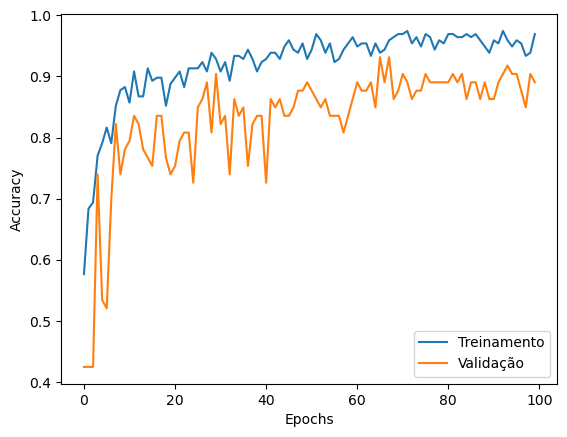

In [418]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()